## Andrew NG Machine Learning Course - Exercise 2 - Logistic Regression

### Logistic Regression with Regularisation

In [1]:
# Let's print out the first 5 lines to see what our data looks like!

with open("../machine-learning-ex2/ex2/ex2data2.txt") as datafile:
    head = [next(datafile) for x in range(5)]
print(head)

['0.051267,0.69956,1\n', '-0.092742,0.68494,1\n', '-0.21371,0.69225,1\n', '-0.375,0.50219,1\n', '-0.51325,0.46564,1\n']


In [2]:
# Looks like a CSV. Let's load it into a data frame.

import pandas as pd 

df = pd.read_csv("../machine-learning-ex2/ex2/ex2data2.txt", header = None) 
# Preview the first 5 lines of the loaded data 
df.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


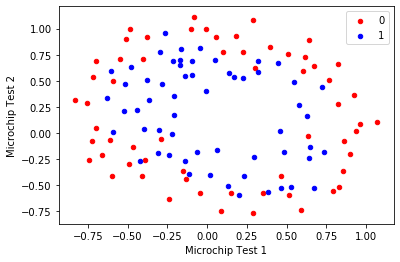

In [4]:
# Let's plot the data next.

import matplotlib
import matplotlib.pyplot as plt

df.columns = ['Microchip Test 1','Microchip Test 2', 'Result']

colors = {0: 'red',1:'blue'}

_, ax = plt.subplots()
for key,group in df.groupby('Result'):
    group.plot.scatter(ax=ax, x='Microchip Test 1', y='Microchip Test 2', label=key, color = colors[key]);


In [6]:
import numpy as np

# Let's make our variable matrix X.
# We need to take the exam score columnns from our data and add
# another dimension to accomodate the theta0 intercept term.

m = df['Microchip Test 1'].count()
print("Number of rows/training examples are: ", m)

microchip_test_1 = df['Microchip Test 1'].to_numpy()
microchip_test_2 = df['Microchip Test 2'].to_numpy()
intercept = np.ones((m))

X = np.hstack((intercept.reshape(-1,1),microchip_test_1.reshape(-1,1),microchip_test_2.reshape(-1,1)))

print("First 5 rows of X are: ")
print(X[0:5,:])

Number of rows/training examples are:  118
First 5 rows of X are: 
[[ 1.        0.051267  0.69956 ]
 [ 1.       -0.092742  0.68494 ]
 [ 1.       -0.21371   0.69225 ]
 [ 1.       -0.375     0.50219 ]
 [ 1.       -0.51325   0.46564 ]]


In [7]:
# Here we perform feature mapping to create a 6th degree polynomial model.

def map_feature(X1, X2):
    degree = 6
    out = np.ones((X1.shape))
    
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out,np.power(X1, (i-j))*np.power(X2,j)))
            
    return out

m , n = X.shape[0], X.shape[1]
print('Input matrix was {0} x {1}'.format(m, n))

X1 = df['Microchip Test 1'].to_numpy().reshape(-1,1)
X2 = df['Microchip Test 2'].to_numpy().reshape(-1,1)
X_poly = map_feature(X1, X2)

# print("First 5 rows of X_poly are: ")
# print(X_poly[0:5,:])

m , n = X_poly.shape[0], X_poly.shape[1]
print('Output matrix is expected to be 118 x 28. Was {0} x {1}'.format(m, n))


Input matrix was 118 x 3
Output matrix is expected to be 118 x 28. Was 118 x 28


In [9]:
# Here we define a cost function to include the regularisation parameter
def sigmoid(z):
    return 1/(1+np.exp(-z))

print ('Sigmoid of 0 should be 0.5. We got',sigmoid(0))

def cost_function(theta, X, y, lamb):
    
    m=len(y)
    n=len(theta)
    
    predictions = sigmoid(np.dot(X,theta))
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))
    cost_reg = lamb/(2*m)*sum(np.power(theta[1:n],2))
    
    cost = 1/m * sum(error) + cost_reg
    
    grad_reg = (lamb/m)*theta[1:n]
    grad = 1/m * np.dot(X.transpose(),(predictions - y))
    
    return cost[0], grad



# Check new cost function.
# Test out cost function with initial theta.

lamb=1
initial_theta = np.zeros((28,1)).reshape(-1,1)
y = df['Result'].to_numpy().reshape(-1,1)

print('Cost of initial theta is ', cost_function(initial_theta, X_poly, y, lamb)[0])

Sigmoid of 0 should be 0.5. We got 0.5
Cost of initial theta is  0.6931471805599461


<Figure size 432x288 with 0 Axes>

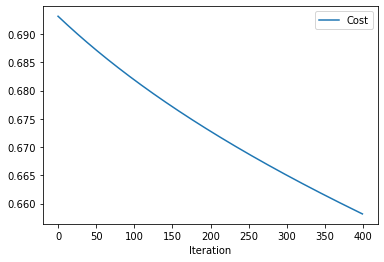

In [11]:
def gradient_descent(X,y,theta,alpha,num_iters,lamb):
    
    m=len(y)
    J_history =[]
    iteration_num=[]
    
    for i in range(num_iters):
        cost, grad = cost_function(theta,X,y,lamb)
        theta = theta - (alpha * grad)
        J_history.append(cost)
        iteration_num.append(i)
    
    return theta , J_history, iteration_num

def train_and_plot(alpha,iterations,lamb):
    theta, J_history, iteration_num = gradient_descent(X_poly, y, initial_theta, alpha, iterations,lamb)


    # Plot cost over iterations.
    J_df = pd.DataFrame(iteration_num, J_history)
    J_df = pd.DataFrame(
        {'Iteration': iteration_num,
         'Cost': J_history
        })

    J_df.head()

    plt.figure(2) 
    J_df.plot(x='Iteration', y='Cost', kind = 'line')
    plt.show()

iterations = 400
alpha = 0.01
lamb = 1
train_and_plot(alpha,iterations,lamb)

<Figure size 432x288 with 0 Axes>

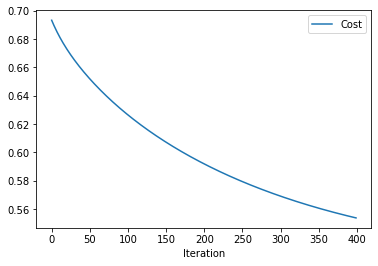

In [12]:
iterations = 400
alpha = 0.1
lamb = 1
train_and_plot(alpha,iterations,lamb)

<Figure size 432x288 with 0 Axes>

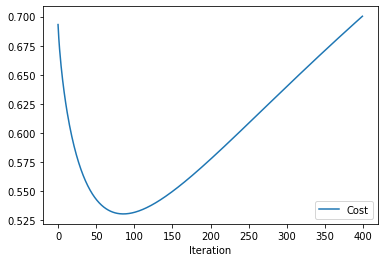

In [13]:
iterations = 400
alpha = 1
lamb = 1
train_and_plot(alpha,iterations,lamb)

In [ ]:
iterations = 100000
alpha = 0.005
lamb = 1
train_and_plot(alpha,iterations,lamb)